In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv('fake_reg.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [ ]:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [ ]:
df.head

<bound method NDFrame.head of           price     feature1     feature2
0    461.527929   999.787558   999.766096
1    548.130011   998.861615  1001.042403
2    410.297162  1000.070267   998.844015
3    540.382220   999.952251  1000.440940
4    546.024553  1000.446011  1000.338531
..          ...          ...          ...
995  476.526078  1000.018988   999.672732
996  457.313186   998.855379  1000.020026
997  456.720992  1001.451646   998.847606
998  403.315576  1000.771023   998.562851
999  599.367093   999.232244  1001.451407

[1000 rows x 3 columns]>

In [ ]:
x = df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
type(x)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=(0.33))

In [ ]:
x

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [ ]:
model = Sequential()

model.add(Dense(4,activation='relu'))

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(loss = 'mse')

In [ ]:
model.fit(x_train,y_train, epochs=350)

Epoch 1/350
21/21 [==============================] - 1s 2ms/step - loss: 258469.0156
Epoch 2/350
21/21 [==============================] - 0s 2ms/step - loss: 258348.4688
Epoch 3/350
21/21 [==============================] - 0s 2ms/step - loss: 258216.0000
Epoch 4/350
21/21 [==============================] - 0s 2ms/step - loss: 258059.7031
Epoch 5/350
21/21 [==============================] - 0s 2ms/step - loss: 257872.0312
Epoch 6/350
21/21 [==============================] - 0s 2ms/step - loss: 257638.9062
Epoch 7/350
21/21 [==============================] - 0s 2ms/step - loss: 257347.9375
Epoch 8/350
21/21 [==============================] - 0s 2ms/step - loss: 257003.1719
Epoch 9/350
21/21 [==============================] - 0s 2ms/step - loss: 256610.4375
Epoch 10/350
21/21 [==============================] - 0s 2ms/step - loss: 256164.8281
Epoch 11/350
21/21 [==============================] - 0s 2ms/step - loss: 255667.8438
Epoch 12/350
21/21 [==============================] - 0s 2ms/st

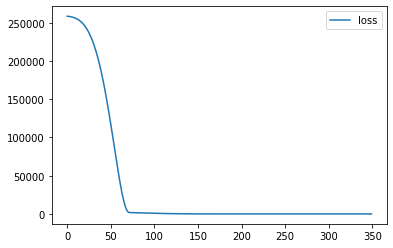

In [ ]:
lossdf = pd.DataFrame(model.history.history)
lossdf.plot()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_absolute_error(y_test, predictions)

3.9151577266026676

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

4.868239277322693

In [ ]:
df['price'].mean()

498.67302899671853

In [ ]:
new_gem = [[1000, 988]]

In [ ]:
scaled_gem = scaler.transform(new_gem)

In [ ]:
model.predict(scaled_gem)

array([[23.61417]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('gem model.h5')

In [ ]:
loadedModel = load_model('gem model.h5')

In [ ]:
loadedModel.predict(scaled_gem)

array([[23.61417]], dtype=float32)

In [ ]:
model.save('my model')

INFO:tensorflow:Assets written to: my model/assets
